In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Vamos a trabajar solo con los siguientes DataFrames, los cuales nos brindan información
clave para el análisis, esta información está relacionada con la cantidad de hogares que tienen
acceso a internet, el tipo de tecnología, velocidad de internet, ingresos; lo que nos puede ayudar a tener un mejor conocimiento de que está pasando con el servicio de internet y conocer el
acceso en números que tiene la población. Además de que contienen fechas traducidas en trimestres
que nos pueden ayudar a hacer un análisis en el tiempo, lo cual es vital si se quiere mejorar el 
servicio y encontrar opotunidades de crecimeinto.

In [2]:
df_acc_tec=pd.read_csv('C:/Users/NOVATEC/Documents/CSV/Acceso_tec.csv', sep=',', encoding='utf-8')
df_acc_vel=pd.read_csv('C:/Users/NOVATEC/Documents/CSV/Acceso_vel.csv', sep=',', encoding='utf-8')
df_ingresos=pd.read_csv('C:/Users/NOVATEC/Documents/CSV/Ingresos.csv', sep=',', encoding='utf-8')
df_p_hogares=pd.read_csv('C:/Users/NOVATEC/Documents/CSV/Penetracion_hogares.csv', sep=',', encoding='utf-8')
df_p_poblacion=pd.read_csv('C:/Users/NOVATEC/Documents/CSV/Penetracion_poblacion.csv', sep=',', encoding='utf-8')
df_p_totales=pd.read_csv('C:/Users/NOVATEC/Documents/CSV/Penetracion_totales.csv', sep=',', encoding='utf-8')
df_total_acc_tec=pd.read_csv('C:/Users/NOVATEC/Documents/CSV/Total_acceso_tec.csv', sep=',', encoding='utf-8')
df_vel_prom_prov=pd.read_csv('C:/Users/NOVATEC/Documents/CSV/Vel_promedio_prov.csv', sep=',', encoding='utf-8')


1.- Limpieza de DataFrames

Algunas columnas se crearon con valores nulos, por lo que las vamos a descartar, también existen columnas que presentan números en formato 'str' por lo que les vamos a cambiar su tipo de dato. Estsos dos fenómenos ocurren en todos los DataFrames, por otro lado, los archivos que tienen la columna provincia, tienen espacios en blanco, es decir, algunas tienen (por poner un ejemplo) 'Buenos Aires', y otras tienen ' Buenos Aires', se modficó para que al momento de hacer gráficos no tuviera repercusiones. También se muestran en pantalla los duplicados, que para este ejercicio, no existe la presencia de los mismos.

Limpieza del Dataframe df_acc_tec

In [3]:
dropping=[9,10,11,12,13,14,15,16]
df_acc_tec_2=df_acc_tec.drop(df_acc_tec.columns[dropping], axis=1)
dropping2=[960,961]
df_acc_tec_3=df_acc_tec_2.drop(df_acc_tec_2.index[dropping2])
df_acc_tec_3['ADSL']=df_acc_tec_3['ADSL'].str.replace(',', '').str.strip().astype(int)
df_acc_tec_3['Año']=df_acc_tec_3['Año'].str.replace(r'\D', '', regex=True)
df_acc_tec_3['Año']=df_acc_tec_3['Año'].astype(int)
df_acc_tec_3['Cablemodem']=df_acc_tec_3['Cablemodem'].str.replace(',', '').str.strip().astype(int)
df_acc_tec_3['Fibra óptica']=df_acc_tec_3['Fibra óptica'].str.replace(',', '').str.strip().astype(int)
df_acc_tec_3['Otros']=df_acc_tec_3['Otros'].str.replace(',', '').str.strip().astype(int)
df_acc_tec_3['Total']=df_acc_tec_3['Total'].str.replace(',', '').str.strip().astype(int)
df_acc_tec_3['Wireless']=df_acc_tec_3['Wireless'].str.replace(',', '').str.strip().astype(int)
df_acc_tec_3.loc[df_acc_tec_3['Año'] == 2019, 'Trimestre'] = df_acc_tec_3.loc[df_acc_tec_3['Año'] == 2019, 'Trimestre'].str.replace('*', '')
df_acc_tec_3['Provincia']=df_acc_tec_3['Provincia'].str.strip()

Limpieza del DataFrame df_acc_vel

En este DataFrame, en la columna año aparece 2024 con trimestre 4, se dedució que el año era 2023 por la continuación a valores que presentaban el año 2023 y trimestre 3

In [4]:
dr=[12,13,14,15,16,17,18,19,20,21,22,23]
df_acc_vel_3=df_acc_vel.drop(df_acc_vel.columns[dr], axis=1)
df_acc_vel_3.columns=df_acc_vel_3.columns.str.strip()
df_acc_vel_3['+ 1 Mbps - 6 Mbps']=df_acc_vel_3['+ 1 Mbps - 6 Mbps'].str.replace(',', '').str.strip().astype(int)
df_acc_vel_3['+ 10 Mbps - 20 Mbps']=df_acc_vel_3['+ 10 Mbps - 20 Mbps'].str.replace(',', '').str.strip().astype(int)
df_acc_vel_3['+ 20 Mbps - 30 Mbps']=df_acc_vel_3['+ 20 Mbps - 30 Mbps'].str.replace(',', '').str.strip().astype(int)
df_acc_vel_3['+ 30 Mbps']=df_acc_vel_3['+ 30 Mbps'].str.replace(',', '').str.strip().astype(int)
df_acc_vel_3['+ 512 Kbps - 1 Mbps']=df_acc_vel_3['+ 512 Kbps - 1 Mbps'].str.replace(',', '').str.strip().astype(int)
df_acc_vel_3['+ 6 Mbps - 10 Mbps']=df_acc_vel_3['+ 6 Mbps - 10 Mbps'].str.replace(',', '').str.strip().astype(int)
df_acc_vel_3['HASTA 512 kbps']=df_acc_vel_3['HASTA 512 kbps'].str.replace(',', '').str.strip().astype(int)
df_acc_vel_3['OTROS']=df_acc_vel_3['OTROS'].fillna('0')
df_acc_vel_3['OTROS']=df_acc_vel_3['OTROS'].replace('NaN', '0')
df_acc_vel_3['OTROS']=df_acc_vel_3['OTROS'].str.replace(',', '')
df_acc_vel_3['OTROS']=df_acc_vel_3['OTROS'].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
df_acc_vel_3['Total']=df_acc_vel_3['Total'].str.replace(',', '').str.strip().astype(int)
df_acc_vel_3['Año']=df_acc_vel_3['Año'].replace(2024, 2023)
df_acc_vel_3['Provincia']=df_acc_vel_3['Provincia'].str.strip()

In [5]:
df_acc_vel_3.duplicated().sum()

0

Limpieza del DataFrame df_ingresos

In [6]:
dropping=[4,5,6,7,8]
df_ingresos_3=df_ingresos.drop(df_ingresos.columns[dropping],axis=1)
df_ingresos_3.columns=df_ingresos_3.columns.str.strip()
df_ingresos_3.rename(columns={'Ingresos (miles de pesos)':'Ingresos'},inplace=True)
df_ingresos_3['Ingresos']=df_ingresos_3['Ingresos'].str.replace(',', '').str.strip().astype(float)
df_ingresos_3['Ingresos'] = df_ingresos_3['Ingresos'].apply(lambda x: float('{:.0f}'.format(x)))
df_ingresos_3['Ingresos']=df_ingresos_3['Ingresos'].astype(int)
df_ingresos_3.loc[df_ingresos_3['Año']==2033, 'Año']=2023

In [7]:
df_ingresos_3.duplicated().sum()

0

Limpieza del DataFrame df_p_hogares

In [8]:
dropping=[4,5,6,7,8,9,10,11]
df_p_hogares_3=df_p_hogares.drop(df_p_hogares.columns[dropping],axis=1)
df_p_hogares_3=df_p_hogares_3.dropna()
df_p_hogares_3['Año'] = pd.to_datetime(df_p_hogares_3['Año'], format='%Y').dt.year
df_p_hogares_3.columns=df_p_hogares_3.columns.str.strip()
df_p_hogares_3['Trimestre']=df_p_hogares_3['Trimestre'].astype(int)
df_p_hogares_3['Provincia']=df_p_hogares_3['Provincia'].str.strip()

In [9]:
df_p_hogares_3.duplicated().sum()

0

Limpieza del DataFrame df_p_poblacion

In [10]:
dropping=[4,5,6,7,8,9,10,11,12,13,14,15,16,17]
df_p_poblacion=df_p_poblacion.drop(df_p_poblacion.columns[dropping],axis=1)
df_p_poblacion_3=df_p_poblacion.dropna()
df_p_poblacion_3.columns=df_p_poblacion_3.columns.str.strip()
df_p_poblacion_3['Año'] = pd.to_datetime(df_p_poblacion_3['Año'], format='%Y').dt.year
df_p_poblacion_3['Trimestre']=df_p_poblacion_3['Trimestre'].astype(int)
df_p_poblacion_3['Provincia']=df_p_poblacion_3['Provincia'].str.strip()

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_14112\3518013312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p_poblacion_3['Año'] = pd.to_datetime(df_p_poblacion_3['Año'], format='%Y').dt.year
C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_14112\3518013312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p_poblacion_3['Trimestre']=df_p_poblacion_3['Trimestre'].astype(int)
C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_14112\3518013312.py:7: SettingWithCopyWarning: 
A value is trying to be set o

In [11]:
df_p_poblacion_3.duplicated().sum()

0

Limpieza del DataFrame df_p_totales

In [12]:
dropping=[5,6,7,8,9,10,11]
df_p_totales_3=df_p_totales.drop(df_p_totales.columns[dropping],axis=1)

In [13]:
df_p_totales_3.duplicated().sum()

0

Limpieza del DataFrame df_total_acc_tec

In [14]:
dropping=[9,10,11,12,13,14,15,16,17,18,19,20,21]
df_total_acc_tec_3=df_total_acc_tec.drop(df_total_acc_tec.columns[dropping],axis=1)
df_total_acc_tec_3=df_total_acc_tec_3.dropna()
df_total_acc_tec_3.columns=df_total_acc_tec_3.columns.str.strip()
df_total_acc_tec_3['Año']=pd.to_datetime(df_total_acc_tec_3['Año'], format='%Y').dt.year
df_total_acc_tec_3['ADSL']=df_total_acc_tec_3['ADSL'].str.replace(',', '').str.strip().astype(int)
df_total_acc_tec_3['Cablemodem']=df_total_acc_tec_3['Cablemodem'].str.replace(',', '').str.strip().astype(int)
df_total_acc_tec_3['Fibra óptica']=df_total_acc_tec_3['Fibra óptica']=df_total_acc_tec_3['Fibra óptica'].str.replace(',', '').str.strip().astype(int)
df_total_acc_tec_3['Otros']=df_total_acc_tec_3['Otros'].str.replace(',', '').str.strip().astype(int)
df_total_acc_tec_3['Total']=df_total_acc_tec_3['Total'].str.replace(',', '').str.strip().astype(int)
df_total_acc_tec_3['Wireless']=df_total_acc_tec_3['Wireless'].str.replace(',', '').str.strip().astype(int)
df_total_acc_tec_3['Trimestre']=df_total_acc_tec_3['Trimestre'].astype(int)

In [15]:
df_total_acc_tec_3.duplicated().sum()

0

Limpieza del DataFrame df_vel_prom_prov

In [16]:
df_vel_prom_prov['Provincia']=df_vel_prom_prov['Provincia'].str.strip()

2.- Deteción de outliers

La detección de outliers es importante para conocer de qué manera se comportan nuestros datos,
a continuación vamos a encontar esos valores dentro de nuestros DataFrames. Un outlier es aquel que
se encuentra fuera del rango entre el valor mínimo y máximo de nuestro espacio muestral, existen
diferentes metodos para calcularlos, en este caso vamos a calcularlos mediante el rango
intercuartil (IQR) y los valores máximos y mínimos

In [17]:
def outlier(df, columns):
    outliers=pd.DataFrame()
    for i in columns:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        lo=Q1 - 1.5 * IQR
        up=Q3 + 1.5 * IQR
        outliers[i]=df[i][(df[i]<lo) | (df[i]>up)]
    return outliers


Outliers para df_acc_tec_3

Se presentan campos con valores NaN en algunas filas, esto se puede interpretar que para esa fila
existen outliers en ciertas columnas pero en las NaN no hay, puede que haya en 'ADSL' pero no
en la columna 'Otros' y este fenómeno se repite en todos los DataFrame.

In [18]:
columnas=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
outliers=outlier(df_acc_tec_3, columnas)
print(outliers)

        ADSL  Cablemodem  Fibra óptica  Wireless    Otros    Total
0     223391     2797700     1784593.0  137993.0  67943.0  5011620
24    237705     2784175     1740239.0  137921.0  68197.0  4968237
48    265537     2766463     1645945.0  138405.0  69138.0  4885488
72    304583     2761043     1551074.0  132458.0  71770.0  4820928
96    325908     2767247     1499149.0  129910.0  72451.0  4794665
..       ...         ...           ...       ...      ...      ...
932   324101      178495           NaN       NaN      NaN   512358
936  1567685     1000879      120960.0       NaN  33824.0  2739876
937   445569      820161           NaN       NaN      NaN  1299918
941   336841      225769           NaN       NaN      NaN   566910
956   322662      174296           NaN       NaN      NaN   506612

[129 rows x 6 columns]


Outliers para df_acc_vel_3

In [19]:
columnas=['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total']
outliers=outlier(df_acc_vel_3, columnas)
print(outliers)

     HASTA 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  \
0             26909              23962.0           228393.0   
24            27440              24820.0           242010.0   
48            28007              24674.0           246067.0   
72            28615              25137.0           249864.0   
96            28934              23347.0           259866.0   
..              ...                  ...                ...   
946            7434                  NaN                NaN   
950            4133                  NaN                NaN   
951            4670                  NaN                NaN   
956            8456             124468.0           345225.0   
957            1234                  NaN                NaN   

     + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps  \
0              239339.0             246144.0             110876.0  4042646.0   
24             241310.0             246076.0             112159.0  3951660.0   
48 

Outliers para df_ingresos_3

In [20]:
columnas=['Ingresos']
outliers=outlier(df_ingresos_3, columnas)
print(outliers)

    Ingresos
0  167376015
1  133106593
2  118060280
3  104134993


Outliers para df_p_hogares_3

In [21]:
columnas=['Accesos por cada 100 hogares']
outliers=outlier(df_p_hogares_3, columnas)
print(outliers)

     Accesos por cada 100 hogares
1                          117.02
25                         116.40
49                         115.48
73                         122.59
97                         122.73
121                        122.28
145                        121.31
577                        122.90
601                        121.86
625                        124.06
673                        120.63
697                        120.77
721                        120.04
745                        115.16
769                        118.13
793                        118.29
817                        116.07
841                        114.90
865                        114.90
889                        113.80


Outlier para df_p_poblacion_3

In [22]:
columnas=['Accesos por cada 100 hab']
outliers=outlier(df_p_poblacion_3, columnas)
print(outliers)

     Accesos por cada 100 hab
1                       47.80
25                      47.60
49                      47.27
73                      50.23
97                      50.35
121                     50.22
145                     49.87
169                     46.01
193                     45.85
217                     45.90
241                     45.49
265                     44.83
289                     44.83
313                     44.62
337                     44.15
361                     44.02
385                     44.19
409                     46.90
433                     46.09
457                     45.58
481                     45.25
505                     45.38
529                     44.63
553                     44.56
577                     51.62
601                     51.24
625                     52.24
649                     45.69
673                     45.78
697                     45.85
721                     45.59
745                     43.76
769       

Outliers para df_p_totales_4

Para este DataFrame NO se encontraon outliers

In [23]:
columnas=['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']
outliers=outlier(df_p_totales_3, columnas)
print(outliers)

Empty DataFrame
Columns: [Accesos por cada 100 hogares, Accesos por cada 100 hab]
Index: []


Outliers para df_total_acc_tec_3

In [24]:
columnas=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
outliers=outlier(df_total_acc_tec_3, columnas)
print(outliers)

   ADSL  Cablemodem  Fibra óptica  Wireless  Otros  Total
0   NaN         NaN       3908183       NaN    NaN    NaN
1   NaN         NaN       3708718       NaN    NaN    NaN


Outliers para df_vel_prom_prov

In [25]:
columnas=['Mbps (Media de bajada)']
outliers=outlier(df_vel_prom_prov, columnas)
print(outliers)

     Mbps (Media de bajada)
0                    158.49
1                    234.44
2                     89.40
3                    107.14
5                    114.03
..                      ...
265                   68.29
289                   67.33
313                   63.81
337                   60.48
361                   58.71

[94 rows x 1 columns]


Como se observa, la presencia de una cantidad considerable de outliers en algunas columnas
puede tener varias razones, pero la principal es la naturaleza de los datos, estamos hablando
de mediciones en diferentes zonas de Argentina, esto provoca una variabilidad en los resultados
ya que, al no tener un mismo parametro para las distintas zonas nos arroja datos que están de alguna
manera dispersos y no siguen una distribución normal que nos podría brindar una encuesta que solo
tiene 3 opciones para responder, es por ello del por qué de tantos outliers en nuestra muestra

3.- Analisis con gráficos

Gráficos para df_acc_tec

In [26]:
df_total_acc_tec_3.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,40.000000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,40.000000,4.000000e+01
mean,2018.500000,2.500000,2.791887e+06,4.359240e+06,1.081302e+06,289710.900000,154847.925000,8.676987e+06
std,2.908872,1.132277,1.027693e+06,1.308010e+06,1.179722e+06,197048.992979,82678.927051,1.655946e+06
min,2014.000000,1.000000,8.363900e+05,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2016.000000,1.750000,2.001598e+06,3.102459e+06,1.694705e+05,85307.250000,69048.000000,7.187732e+06
50%,2018.500000,2.500000,3.230908e+06,4.374635e+06,5.125560e+05,270359.000000,172437.000000,8.560895e+06
75%,2021.000000,3.250000,3.716772e+06,5.687862e+06,1.495696e+06,480829.750000,238176.500000,9.918698e+06
max,2023.000000,4.000000,3.803024e+06,6.073426e+06,3.908183e+06,585760.000000,265328.000000,1.154766e+07


Se muestra la suma de accesos a las diferentes tecnologías contenidas en la muestra a lo largo de los
años, en ella se pueden apreciar distintas tendencias y conclusiones.
En el caso de ADSL, se muestra a la baja, por lo que podemos deducir que los usuarios están
migrando hacía otras como puede ser Cablemodem o Fibra óptica que se muestran a la alza
En el caso de Wireless, vemos una estabilidad con poco crecimineto, es decir, que es una tecnología
que mantiene preferencia en los usuarios pero no en aun aumento significativo.
Podemos concluir que Cableboom presenta ventajas sobre las demás y que es la que están
adoptando los usuarios

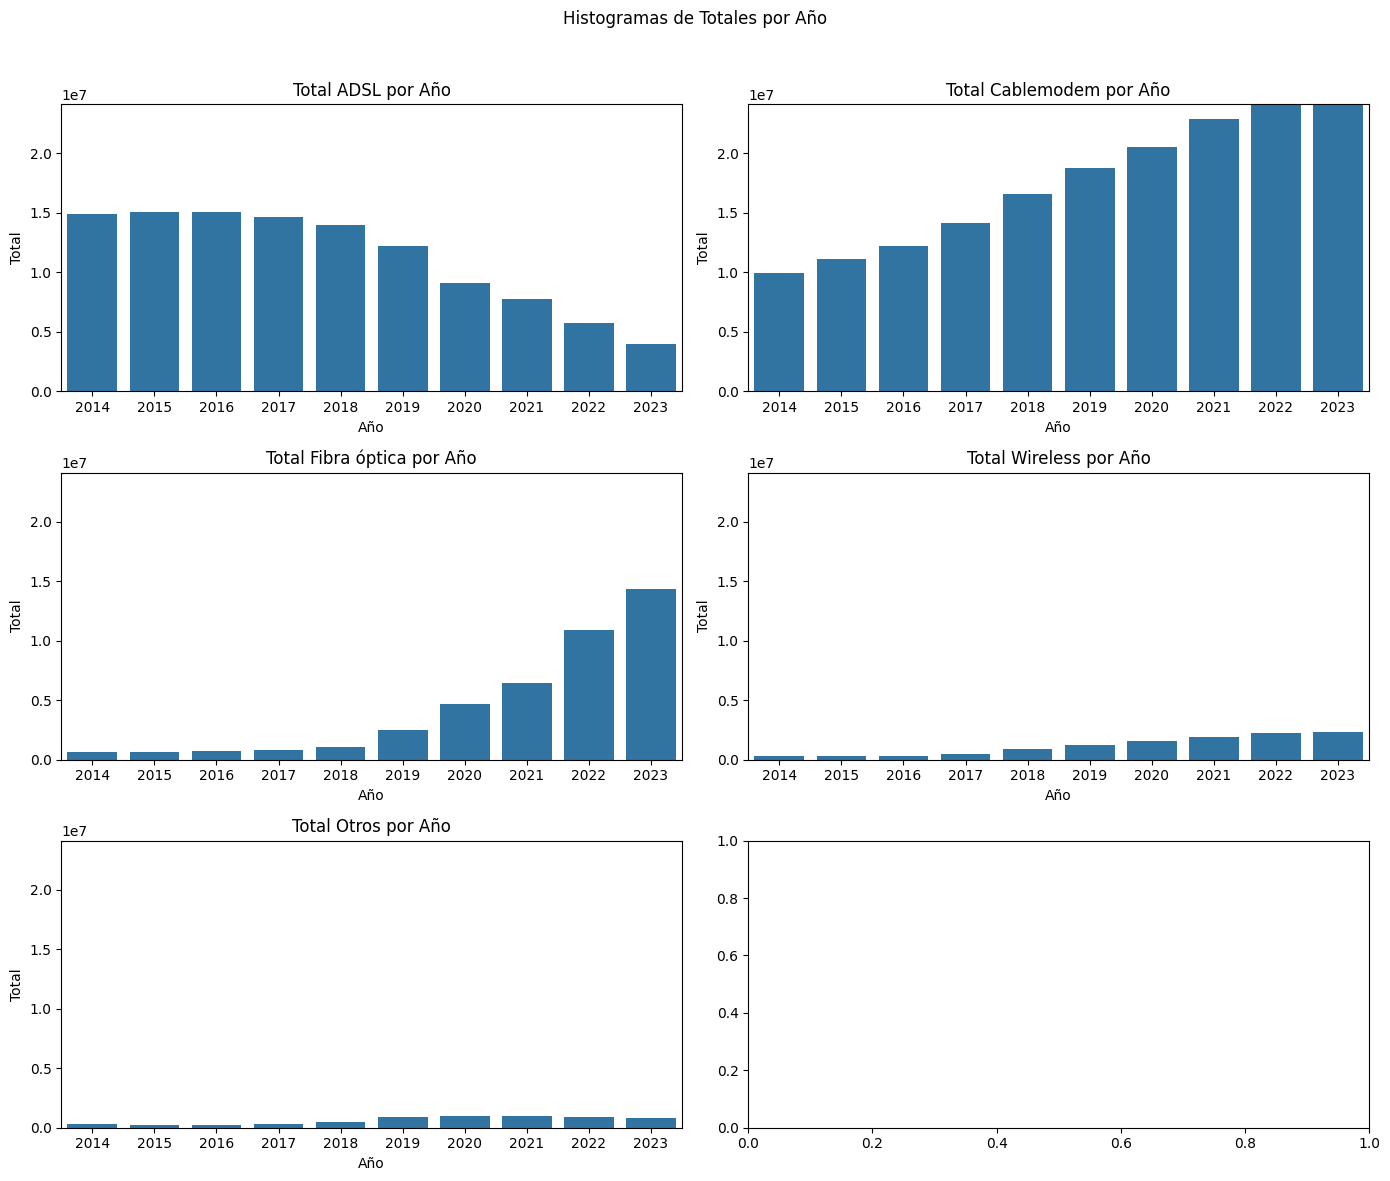

In [27]:
columnas=['Año', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_columnas=df_acc_tec_3[columnas]
df_columnas2=df_columnas.groupby('Año').sum().reset_index()
max_value = df_columnas2[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].max().max()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Histogramas de Totales por Año')

columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.barplot(x='Año', y=col, data=df_columnas2, ax=axes[i])
    axes[i].set_title(f'Total {col} por Año')
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel('Total')
    axes[i].set_ylim(0, max_value)  

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

A continuación se muestra un histograma con la suma de cada tecnología por provincia (19 mejores)
Se rectifica la tendencia de la tecnología Cablemodem que muestra una mayor cantidad de usuarios
en las distintas provincias.
Buenos Aires es la provincia que más cuenta con accesos, que de cierto modo es normal por ser
la capital de Argentina. 
Existen provincias en donde se puede tener una alza como lo son Córdoba y Santa Fe
ya que muestran una buena cantidad de acceso. 
Al ser originario de México desconozco la diversidad demográfica de las demás provincias
en donde se pueden implementar estraegias para lograr tener mayores accesos, habrá que hacer un
estudio en colaboración con algún compañero argentino para poder cumplir con lo ya mencionado
en las provincias de San Luis, Chubut y La Pampa

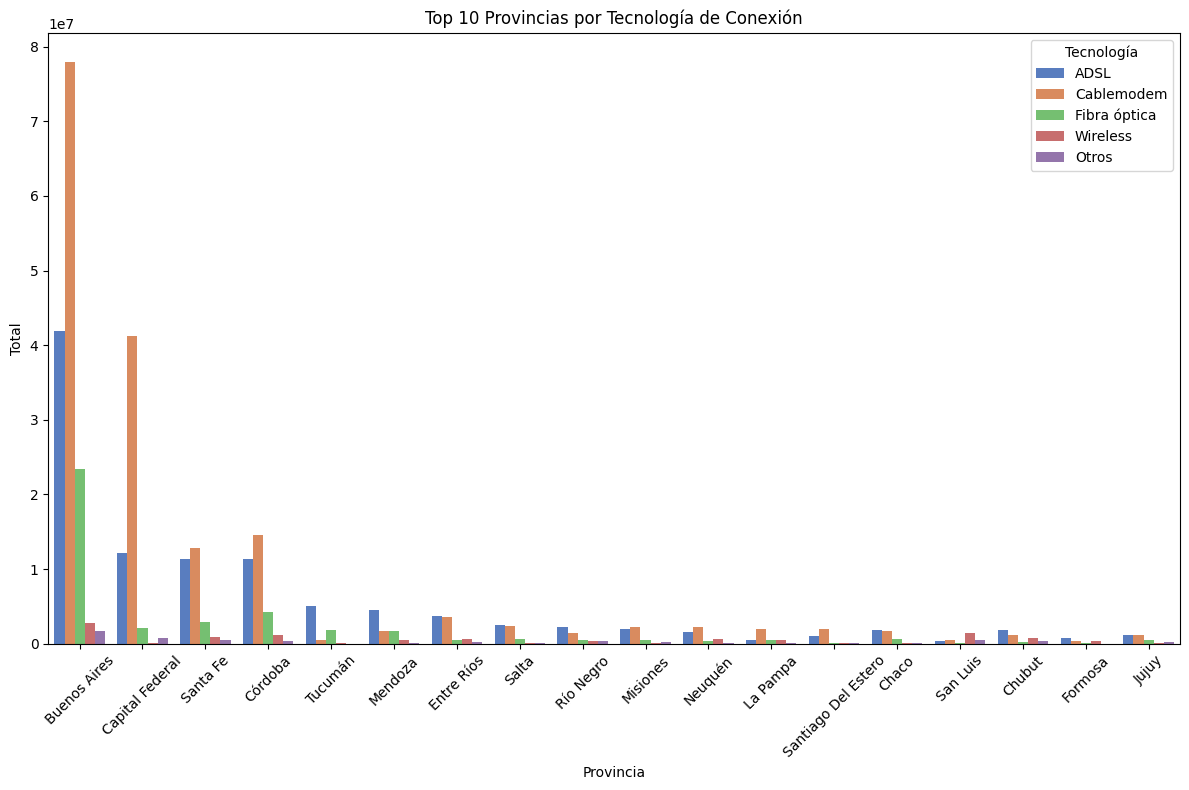

In [28]:
columns_to_keep = ['Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_filtered = df_acc_tec_3[columns_to_keep]

df_totals = df_filtered.groupby('Provincia').sum()

def top_10_provinces(df, column):
    return df.nlargest(10, column)

df_top_provinces = pd.DataFrame()

for col in columns_to_keep[1:]:
    top_provinces = top_10_provinces(df_totals, col)
    df_top_provinces = pd.concat([df_top_provinces, top_provinces], axis=1)

df_top_provinces.reset_index(inplace=True)

plt.figure(figsize=(12, 8))

sns.barplot(x='Provincia', y='value', hue='variable', 
            data=pd.melt(df_top_provinces, id_vars=['Provincia'], 
                         value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']),
            palette='muted')

plt.title('Top 10 Provincias por Tecnología de Conexión')
plt.xlabel('Provincia')
plt.ylabel('Total')

plt.xticks(rotation=45)
plt.legend(title='Tecnología')
plt.tight_layout()
plt.show()

El siguiente boxplot nos muestra las medidas de tendencia central pero sobre todo, los outliers
que previamente obtuvimos, vemos la cantidad de ellos que ya se mencionaron y también que la
tecnología Cablemodem presenta más, esto puede ser debido a lo que se ha visto a lo largo del análisis
y esto es una tendencia a la alza y que hay más datos asociados a esta tecnología.

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_14112\3692550697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='value', y='variable', data=df_columnas, orient='h', palette='Set3')


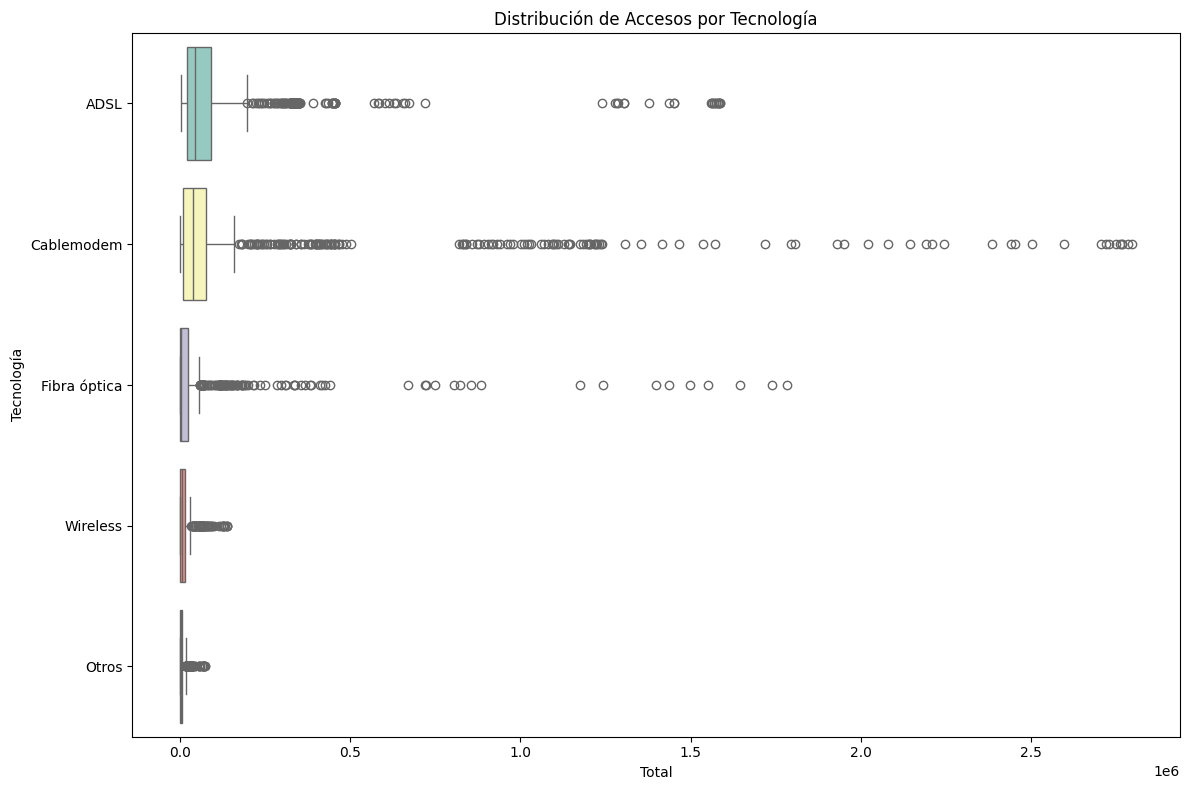

In [29]:
columnas=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

df_columnas=df_acc_tec_3.melt(id_vars=['Año', 'Trimestre', 'Provincia'], value_vars=columnas)

plt.figure(figsize=(12, 8))

sns.boxplot(x='value', y='variable', data=df_columnas, orient='h', palette='Set3')

plt.title('Distribución de Accesos por Tecnología')
plt.xlabel('Total')
plt.ylabel('Tecnología')

plt.tight_layout()
plt.show()

Gráficos para df_acc_vel_3

La siguiente gráfica muestra los accesos por velocidad a lo largo de los años, vemos una clara
tendencia a la alza a partir del 2018 del internet de +30 Mbps, pero después vemos una bajada
considerable que se ve en las demás velocidades, ¿qué pasó?, mi teoría es que debido al aumento de esta velocidad las demás dejaron de ser relevantes, habrá que hacer una análisis de todos los demás entornos que envuelven a este rubro.
Hay una velocidad que es la de + 6 Mbps - 10 Mbps que tiene un comportamiento estable, y que se puede
deber a una preferencia hacía esta velocidad.
Existe una oportunidad de mejora en la velocidad de + 30 Mbps en donde se puede ofrecer este servicio
aunado a la tecnlogía en ascenso, el Cablemodem

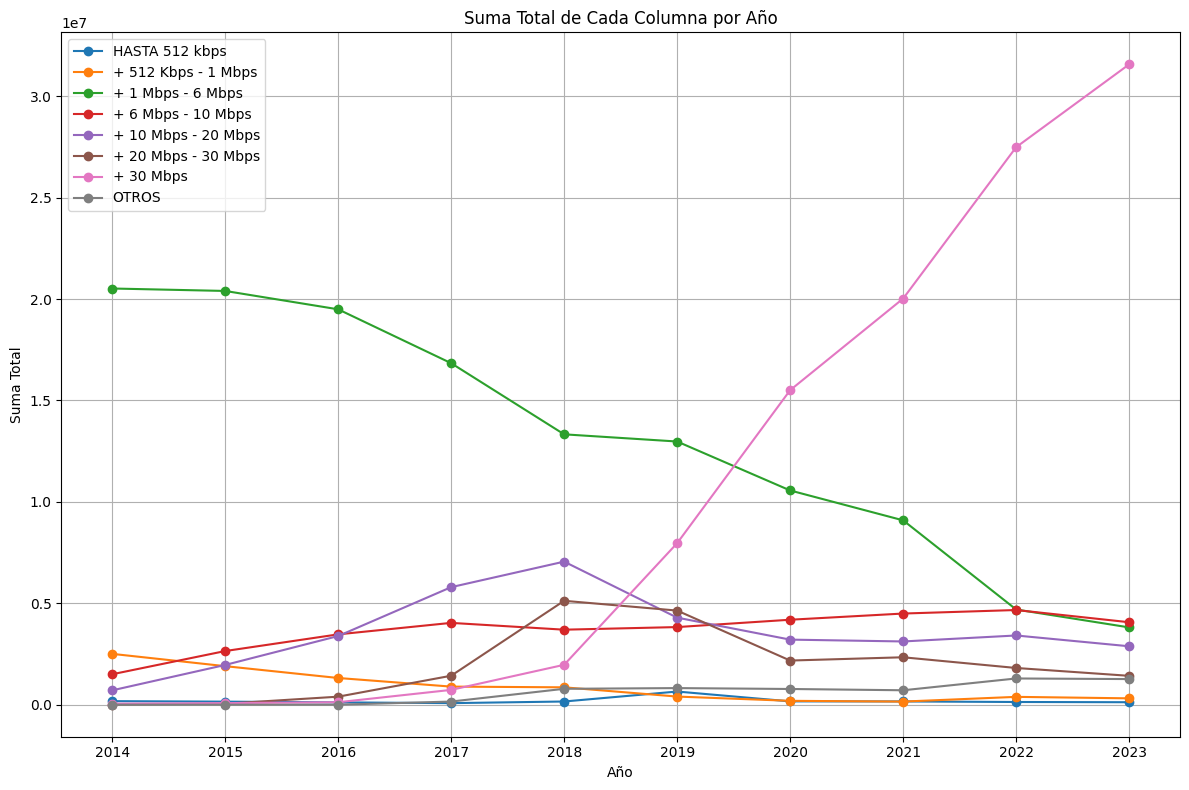

In [30]:
sum_por_año = df_acc_vel_3.groupby('Año').sum()

columnas_numericas = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
                      '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
                      '+ 30 Mbps', 'OTROS']

plt.figure(figsize=(12, 8))

for columna in columnas_numericas:
    plt.plot(sum_por_año.index, sum_por_año[columna], marker='o', label=columna)

plt.title('Suma Total de Cada Columna por Año')
plt.xlabel('Año')
plt.ylabel('Suma Total')
plt.xticks(sum_por_año.index)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Ahora vemos una comparativa del internet con más taza de incremento (+ 30 Mbps) y la más estable
(+6 Mbps - 10 Mbps), en donde vemmos una diferencia, pero, en algunas provincias donde hay menor
frecuencia es donde vemos más paridad, incluso en la provincia de Salta hay ligeramente más 
frecuencia qde la velocidad de +6 Mbps - 10 Mbps.

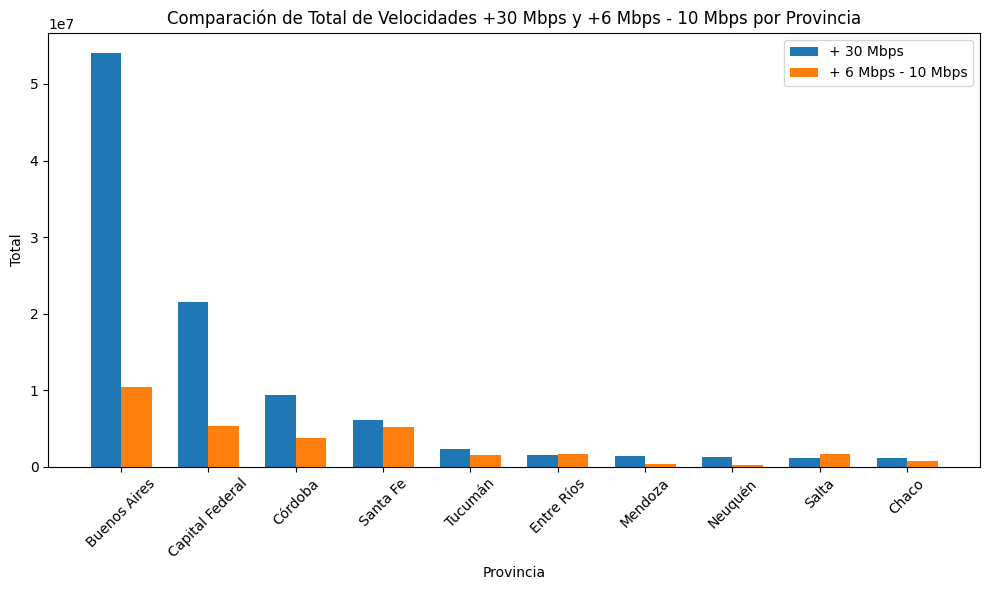

In [31]:
df_sum=df_acc_vel_3.groupby('Provincia')[['+ 30 Mbps', '+ 6 Mbps - 10 Mbps']].sum()

top_provincias=df_sum.sort_values(by='+ 30 Mbps', ascending=False).head(10)

provincias=top_provincias.index
total_30mbps=top_provincias['+ 30 Mbps']
total_6_10mbps=top_provincias['+ 6 Mbps - 10 Mbps']

fig, ax=plt.subplots(figsize=(10, 6))
bar_width=0.35
index=range(len(provincias))

bar1=ax.bar(index, total_30mbps, bar_width, label='+ 30 Mbps')
bar2=ax.bar([i + bar_width for i in index], total_6_10mbps, bar_width, label='+ 6 Mbps - 10 Mbps')

ax.set_xlabel('Provincia')
ax.set_ylabel('Total')
ax.set_title('Comparación de Total de Velocidades +30 Mbps y +6 Mbps - 10 Mbps por Provincia')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(provincias)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gráficos para df_ingresos_3

El tema de ingresos es importante para poder ofrecer mejores servicios y mejor oferta, 
vemos que claramente se alcanzó un pico en el año 2023 y esto es gracias al aumento en la demanda de internet y a las tecnologías que también han crecido. Esto es una buena señal para la empresa, porque hubo un incremento mayor entre el 2023 y 2023

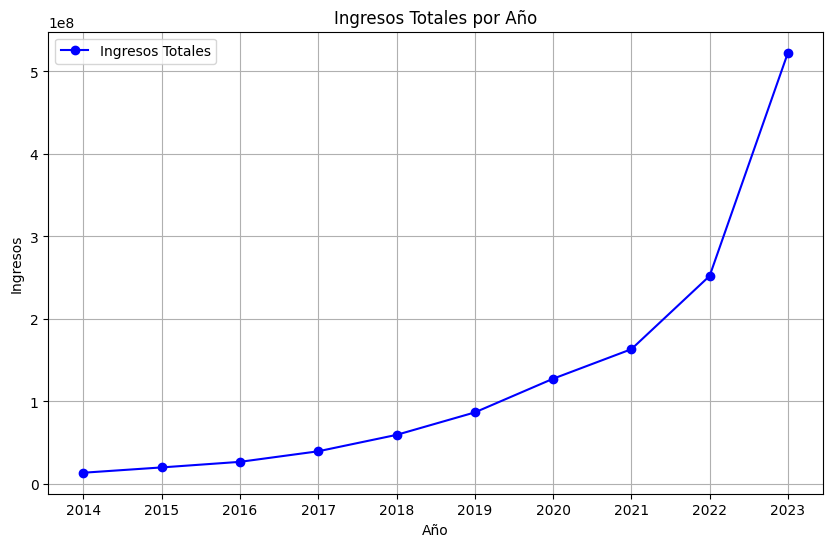

In [32]:
grouped = df_ingresos_3.groupby('Año')['Ingresos'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(grouped['Año'], grouped['Ingresos'], marker='o', color='b', label='Ingresos Totales')

plt.title('Ingresos Totales por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos')
plt.xticks(grouped['Año'])  # Asegúrate de que solo los años presentes se muestren en el eje x
plt.legend()
plt.grid(True)
plt.show()

Gráficos para df_p_hogares_3

Este gráfico nos muestra el acceso por cada 100 hogares, podemos sacar información valiosa,
primero, recordar que este DataFrame presenta valores atípicos por encima de 100, esto hace que
la gráfica esté sesgada hacía la derecha como lo vemos. Mientras que en la mayoría de las 
provincias tienen un acceso moderado y en muy pocas se alcanza un pocentaje por encima del 50%

In [33]:
df_p_hogares_3.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,51.662552
std,2.873778,1.118617,23.898050
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.750000,32.857500
50%,2018.500000,2.500000,48.820000
75%,2021.000000,3.250000,65.117500
max,2023.000000,4.000000,124.060000


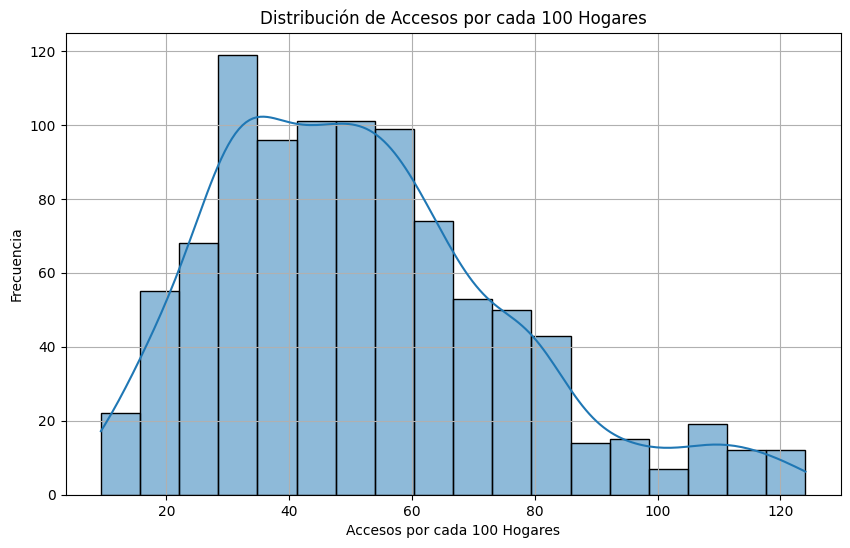

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df_p_hogares_3['Accesos por cada 100 hogares'], kde=True)
plt.title('Distribución de Accesos por cada 100 Hogares')
plt.xlabel('Accesos por cada 100 Hogares')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Observación de outliers de año y trimestres en un boxplot que se van a comparar en el siguiente dataframe

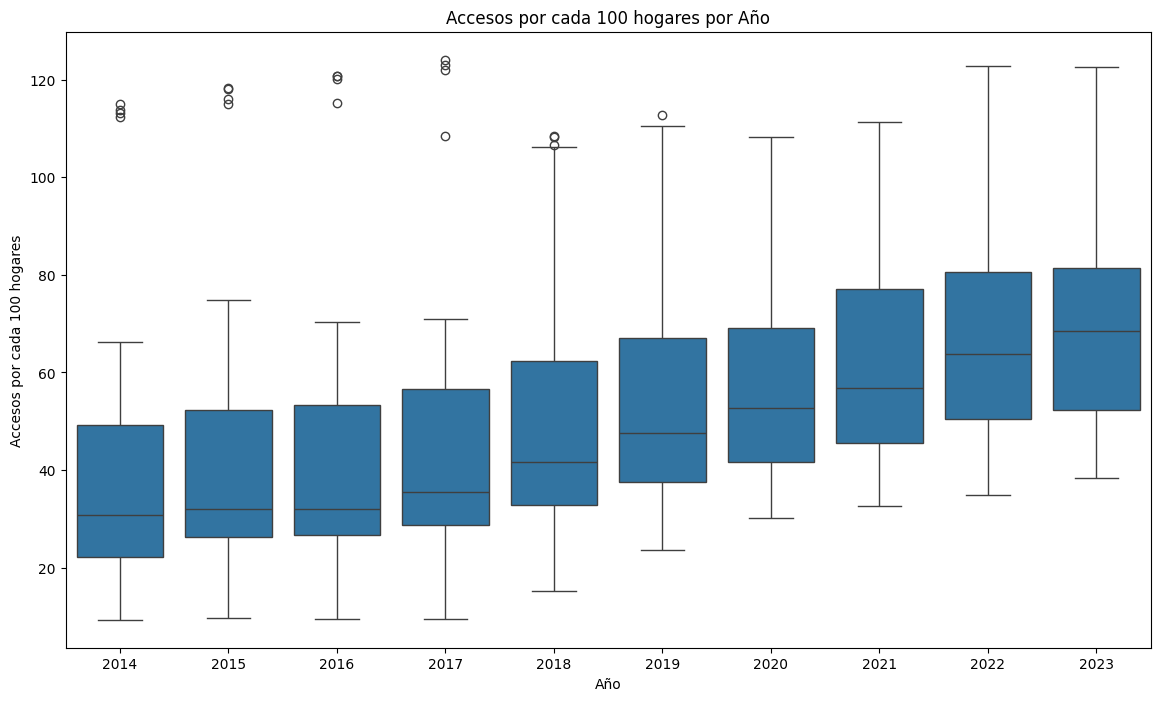

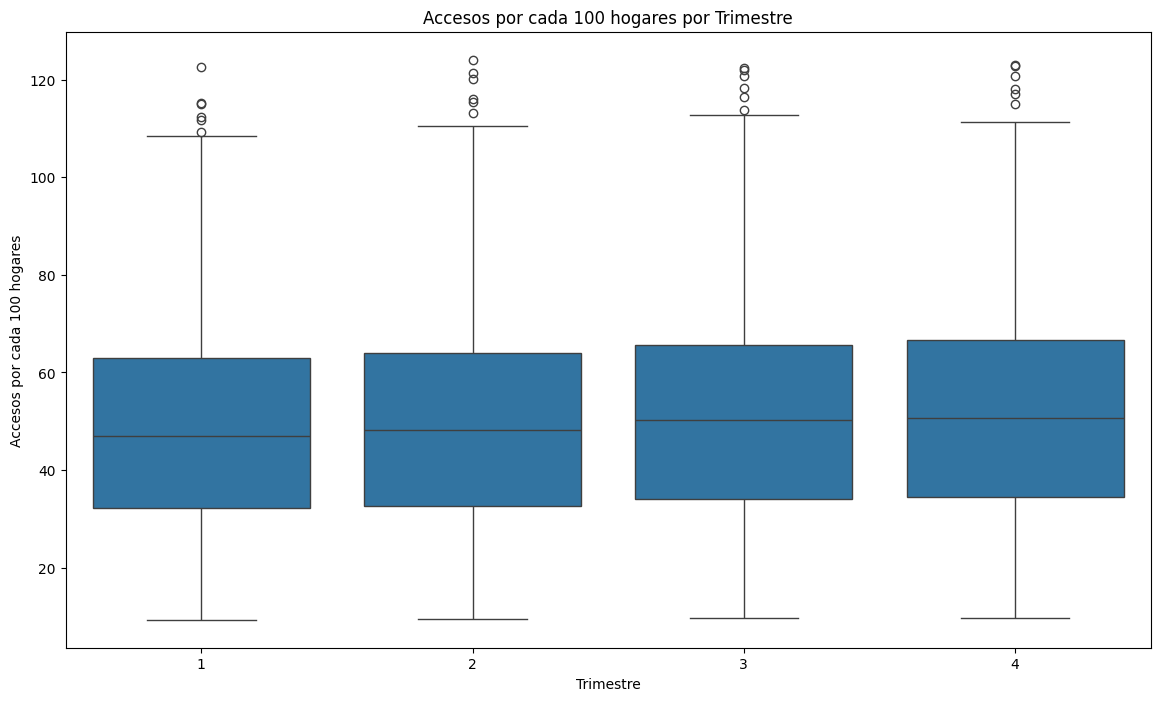

In [35]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Año', y='Accesos por cada 100 hogares', data=df_p_hogares_3)
plt.title('Accesos por cada 100 hogares por Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Trimestre', y='Accesos por cada 100 hogares', data=df_p_hogares_3)
plt.title('Accesos por cada 100 hogares por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.show()

Ahora vemos a lo largo del tiempo los accesos a internet por cada 100 hogares, vemos ha habido un
aumento considerable pero que no rebasan el 80%, sin embargo en todos los trimestres tienen esa 
tendencia, esto puede ser debido a los outliers presentados, sin embargo, el hecho de que se presemte
una alza a lo largo del tiempo es evidentemente bueno en el rubro de las telecoumicaciones.
La oportunidad de mejora está presente en cuanto al acceso, ya que, se pueden implementar estaregias
para seguir con esa tendencia.

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_14112\2065986803.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Año', y='Accesos por cada 100 hogares', hue='Trimestre', data=df_p_hogares_3, ci=None,


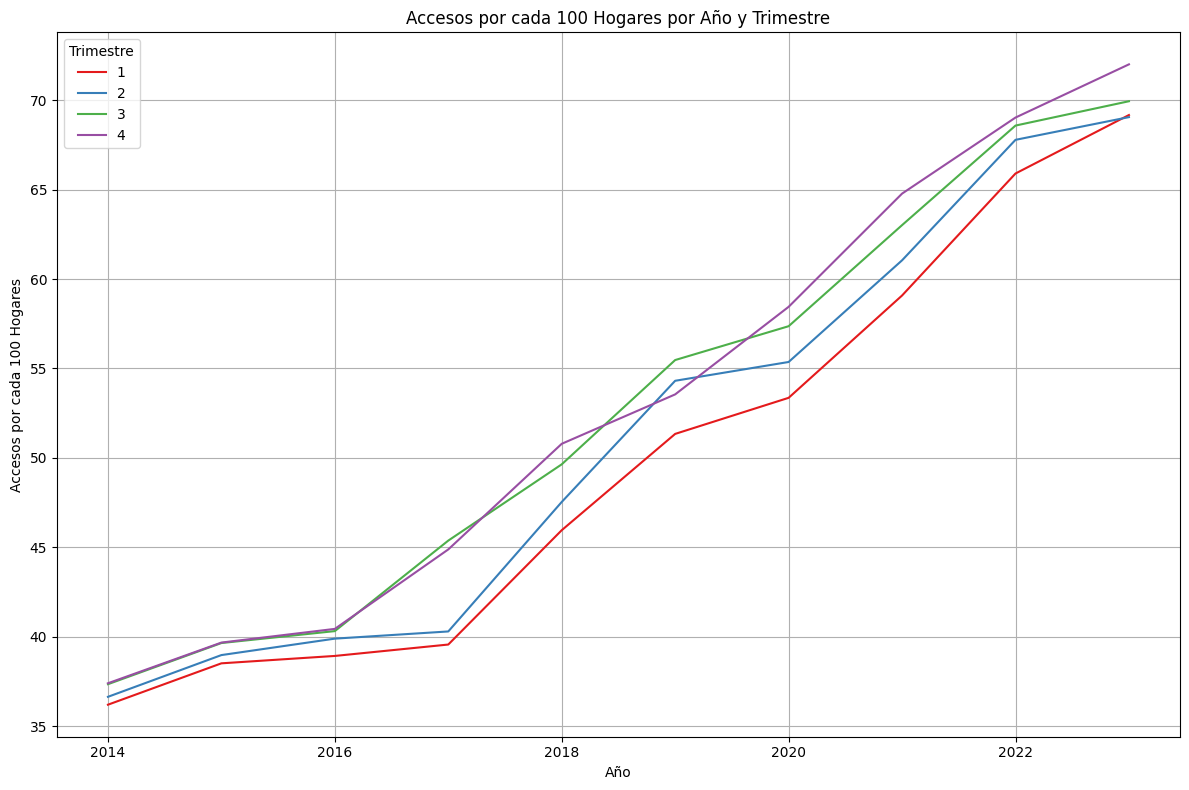

In [36]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', hue='Trimestre', data=df_p_hogares_3, ci=None,
             palette='Set1')
plt.title('Accesos por cada 100 Hogares por Año y Trimestre')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 Hogares')
plt.grid(True)
plt.legend(title='Trimestre')
plt.tight_layout()
plt.show()

Tenemos una gráfica de aceso a internet por cada 100 hoagres representando su media por provincia
pero solo las 10 con mayor media (para fines prácticos), hay que mencionar que Capital Federal tiene
una media por encima de 100 que claramente refleja que presenta outliers, pero, esto también nos puede
decir que los hogares tienen varias tecnologías para el aceso a internet

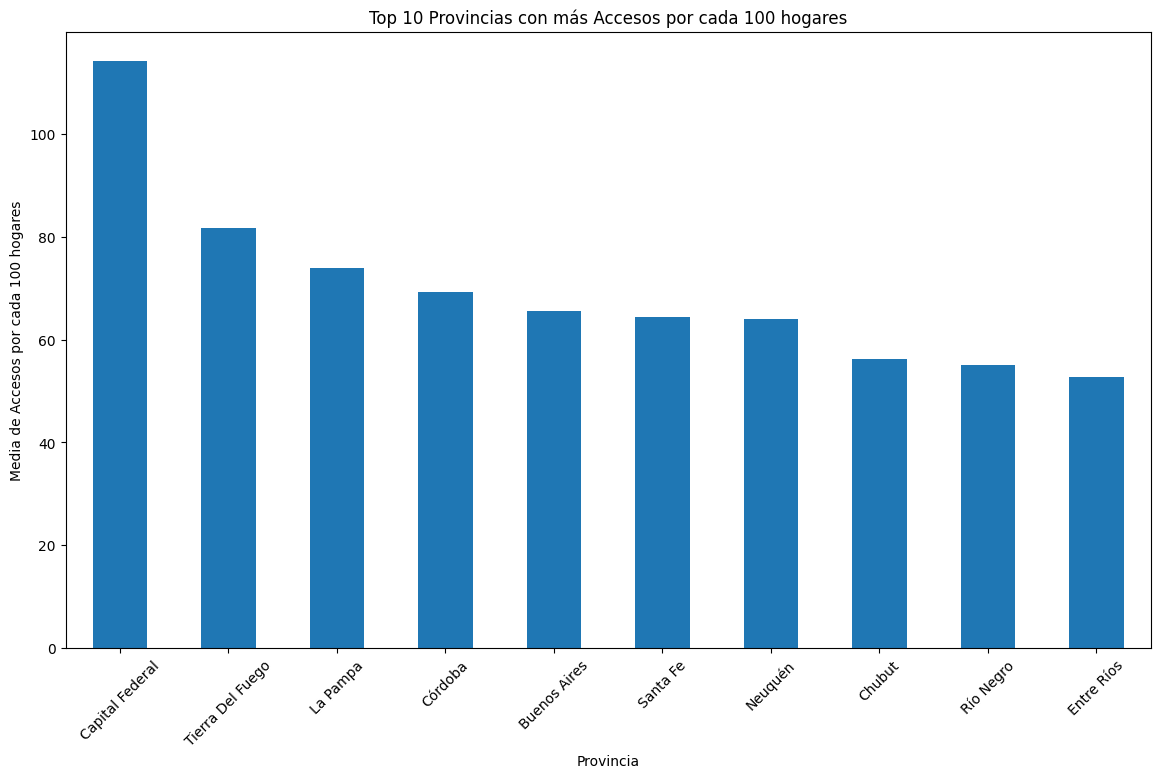

In [37]:
provincia_mean=df_p_hogares_3.groupby('Provincia')['Accesos por cada 100 hogares'].mean().sort_values(ascending=False)

top_10_provincias = provincia_mean.head(10)

plt.figure(figsize=(14, 8))
top_10_provincias.plot(kind='bar')
plt.title('Top 10 Provincias con más Accesos por cada 100 hogares')
plt.xlabel('Provincia')
plt.ylabel('Media de Accesos por cada 100 hogares')
plt.xticks(rotation=45)
plt.show()

Gráficos para df_p_poblacion_3

In [38]:
df_p_poblacion_3.describe()

,Año,Trimestre,Accesos por cada 100 hab
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,15.393969
std,2.873778,1.118617,9.169026
min,2014.000000,1.000000,2.680000
25%,2016.000000,1.750000,8.765000
50%,2018.500000,2.500000,13.420000
75%,2021.000000,3.250000,19.655000
max,2023.000000,4.000000,52.240000


En este gráfico vemos una similitud que en el de hogares, vemos que igual está sesgada a la derecha
ya que también tenemos presencia de outliers, sin embargo, estos outliers tiene valores diferentes
en este caso son valores de rango entre 40-50, se observa que eje x llega hasta 140 algo que es visibllemente notorio, lo que nos hace ver que la concentración de acesos se encuentra en esa zona. En cuanto a los valores dentro del rango de la muestra, vemos una clara frecuencia en los rangoss
entre 9-15, es un rango menor al pasado de hogares, pero, ¿qué podemos deducir?, es diferente
la medida para hogares que de población, aunque sean las mismas entradas (960), las medidas
máximas y mínimas, incluso la media es menor para la población, lo que nos hace pensar que existe un
menor acceso a internet POR PERSONA, en comparación que por hogar. Esto es un contraste que nos ayuda
a nuestro análisis y a buscar soluciones ante este problema.

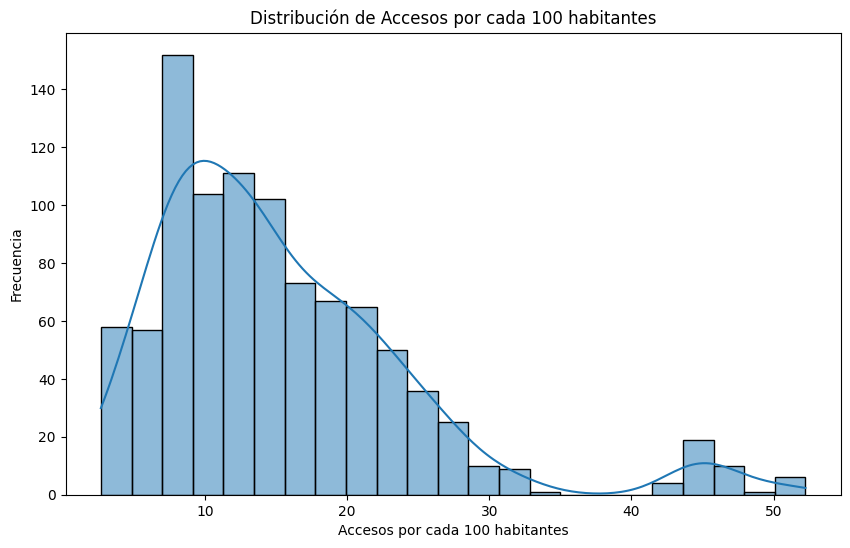

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df_p_poblacion_3['Accesos por cada 100 hab'], kde=True)
plt.title('Distribución de Accesos por cada 100 habitantes')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Frecuencia')
plt.show()

En este gráfico podemos ver claramente los outliers mencionados al igual que el de los trimestres.
Se ve de manera clara que los rangos de los outliers bajaron, pero con la peculiaridad que igual
la muestra va en ascenso de igual manera que en los hogares

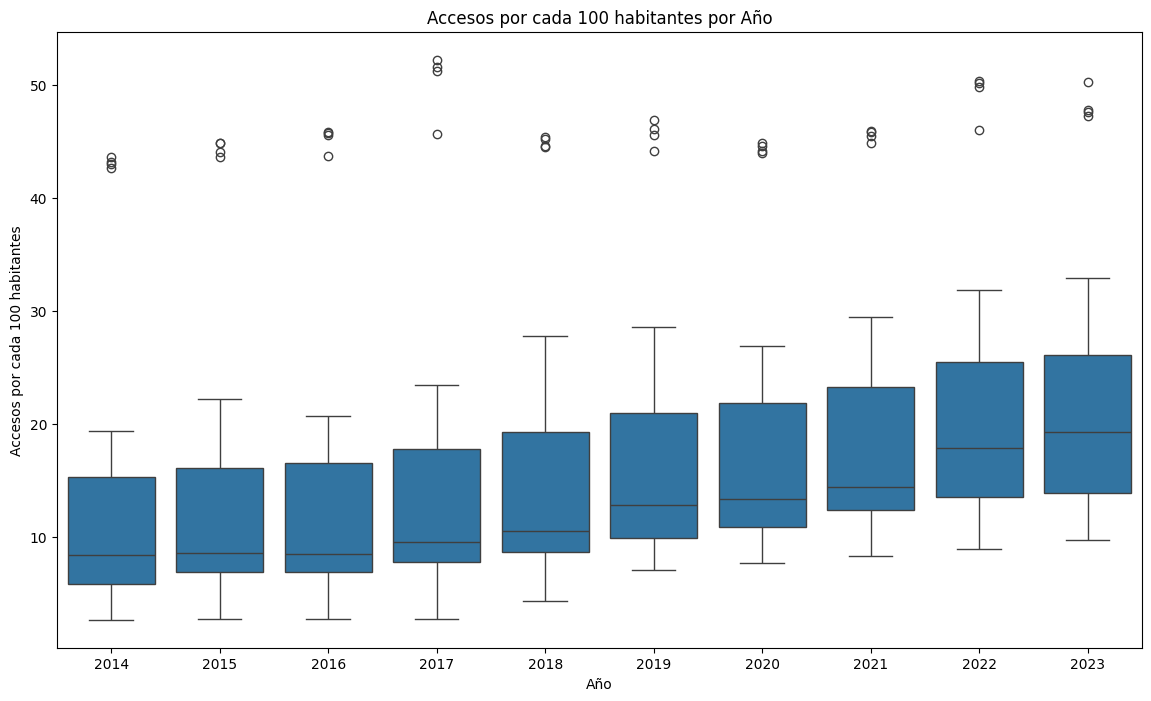

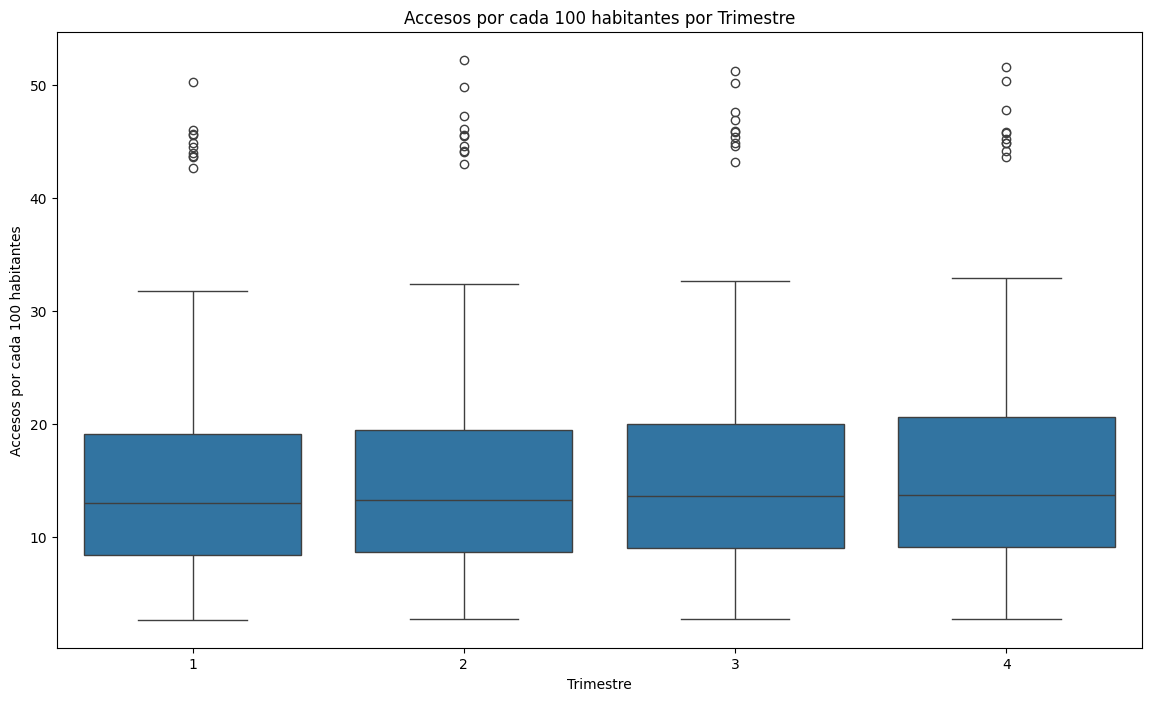

In [40]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Año', y='Accesos por cada 100 hab', data=df_p_poblacion_3)
plt.title('Accesos por cada 100 habitantes por Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 habitantes')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Trimestre', y='Accesos por cada 100 hab', data=df_p_poblacion_3)
plt.title('Accesos por cada 100 habitantes por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 habitantes')
plt.show()

Vemos un comportamineto simmilar en la siguiente grafica que a la de hogares y de esto podemos deducir
que a pesar de ser menor el acceso POR PERSONA eset sigue creciendo y tiende a crecer.

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_14112\2837564833.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Año', y='Accesos por cada 100 hab', hue='Trimestre', data=df_p_poblacion_3, ci=None,


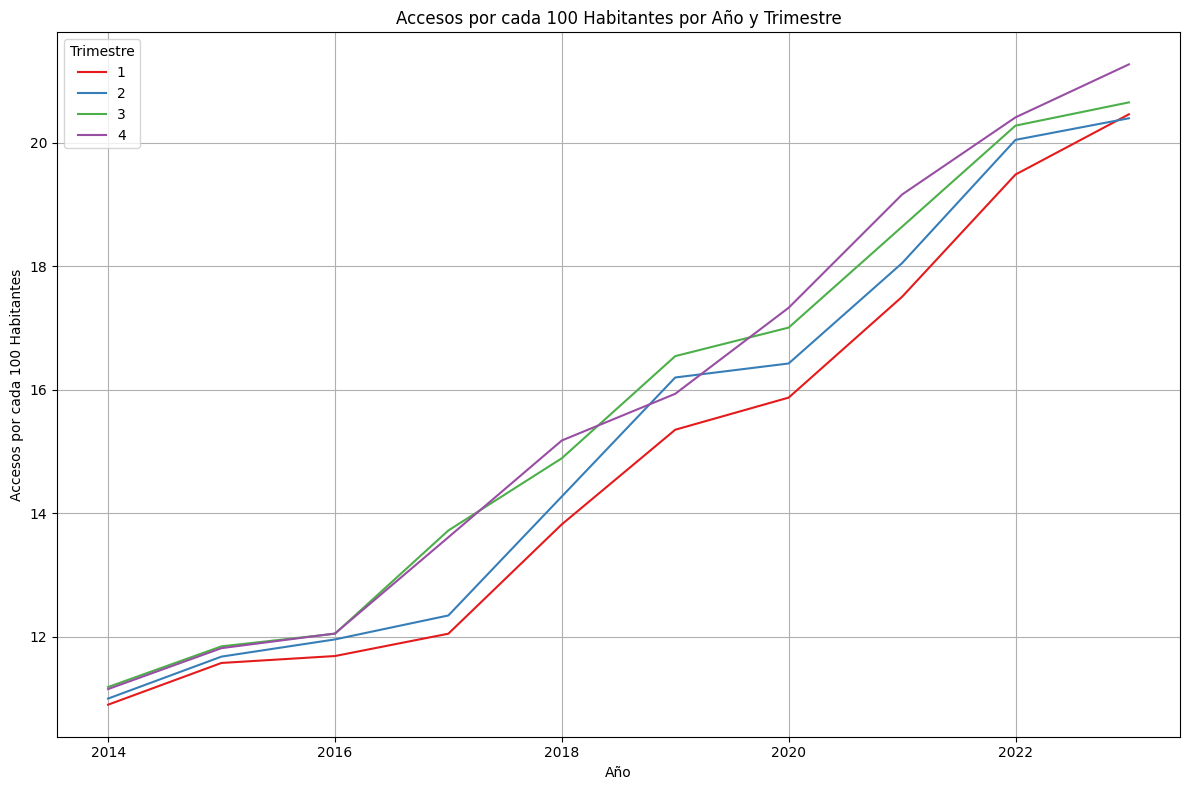

In [41]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Año', y='Accesos por cada 100 hab', hue='Trimestre', data=df_p_poblacion_3, ci=None,
             palette='Set1')
plt.title('Accesos por cada 100 Habitantes por Año y Trimestre')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 Habitantes')
plt.grid(True)
plt.legend(title='Trimestre')
plt.tight_layout()
plt.show()

Observamos un comportamiento parecido, incluso con las mismas provincias presentes.
Ahora, con base al análisis en el DataFrame de ingresos (df_ingresos_3) en donde vimos que los 
ingresos no caían, estos dos graficos del análsis en la población y hogares lo confirman y complementan
al haber un aumento en la demanda de acceso a internet, los ingresos son directamente
proporcionales. Esto favorece a apoyarse de esta clara tendencia y ofrecer alternatias para lograr
esas oportuniddes de mejora que se quieren buscar.

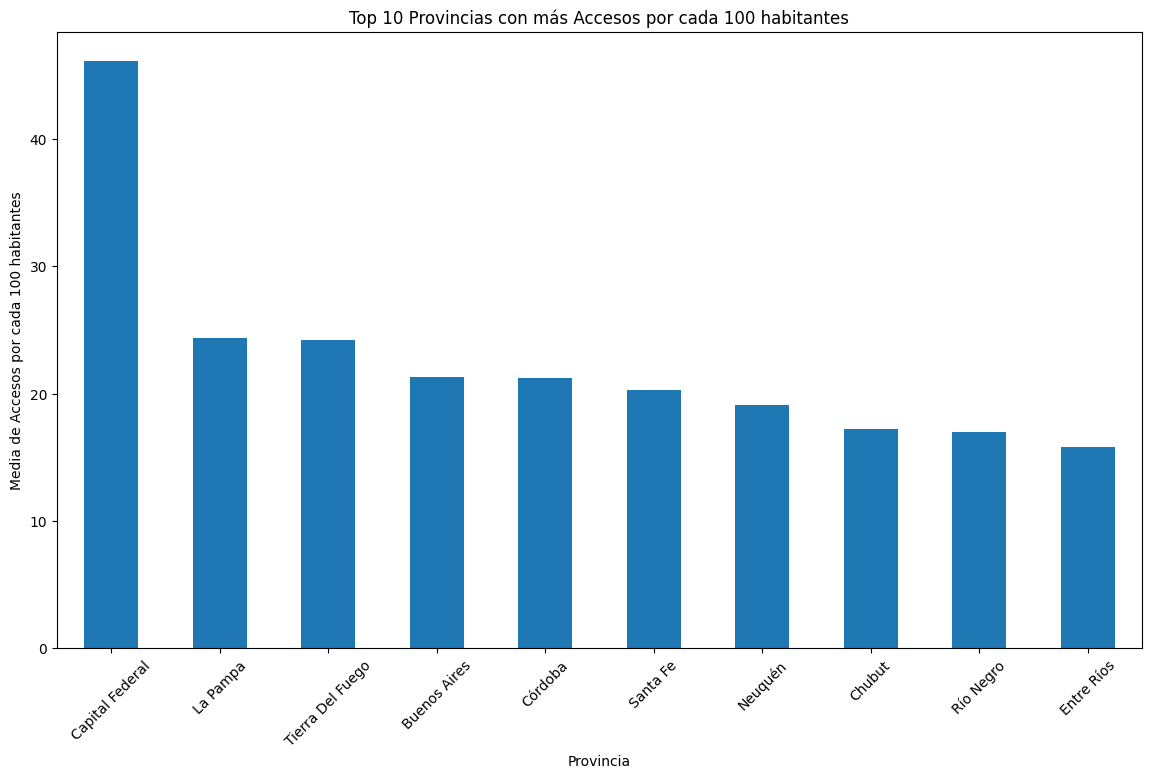

In [42]:
provincia_mean=df_p_poblacion_3.groupby('Provincia')['Accesos por cada 100 hab'].mean().sort_values(ascending=False)

top_10_provincias = provincia_mean.head(10)

plt.figure(figsize=(14, 8))
top_10_provincias.plot(kind='bar')
plt.title('Top 10 Provincias con más Accesos por cada 100 habitantes')
plt.xlabel('Provincia')
plt.ylabel('Media de Accesos por cada 100 habitantes')
plt.xticks(rotation=45)
plt.show()

Gráficos para df_p_totales_3

Se tiliza este DataFrame para ver de una manera más gráfica la diferencia entre hogares y población
vemos que si existe esa disparidad entre las dos, pero recaclcando el aumento de las dos

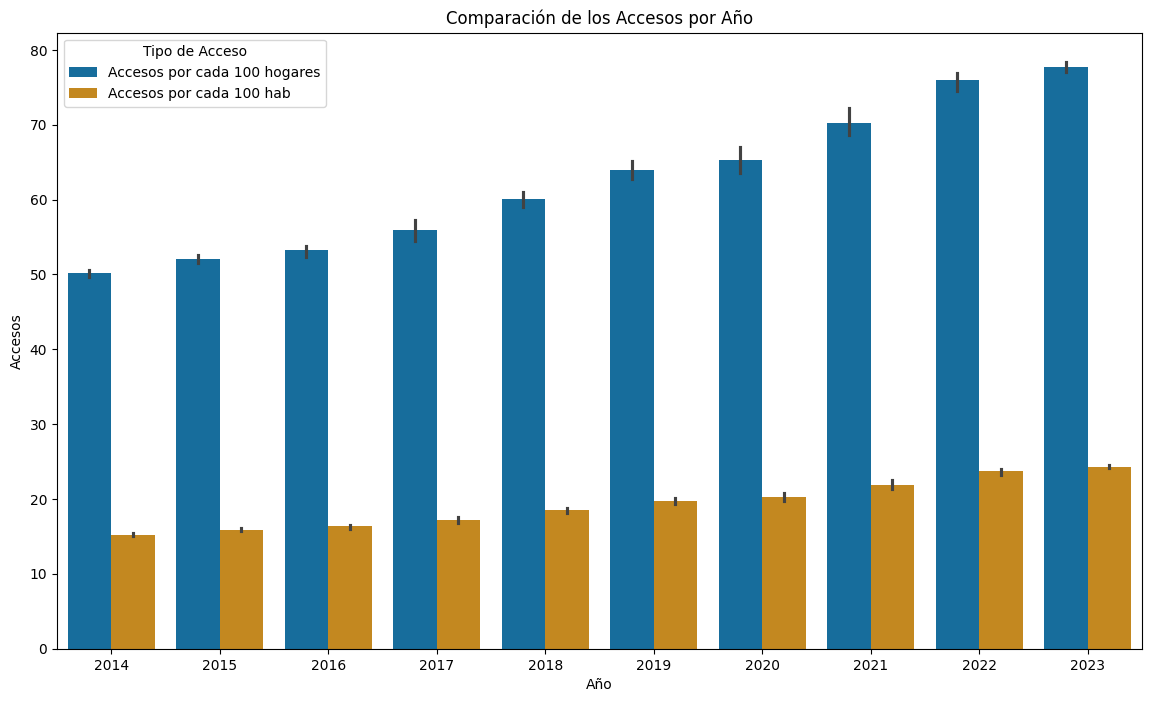

In [43]:
df=df_p_totales_3.melt(id_vars=['Año'], value_vars=['Accesos por cada 100 hogares', 'Accesos por cada 100 hab'],
                    var_name='Tipo de Acceso', value_name='Accesos')

plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Año', y='Accesos', hue='Tipo de Acceso', palette='colorblind')
plt.title('Comparación de los Accesos por Año')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.show()

Gráficos para df_total_acc_tec_3

In [44]:
df_total_acc_tec_3.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,40.000000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,40.000000,4.000000e+01
mean,2018.500000,2.500000,2.791887e+06,4.359240e+06,1.081302e+06,289710.900000,154847.925000,8.676987e+06
std,2.908872,1.132277,1.027693e+06,1.308010e+06,1.179722e+06,197048.992979,82678.927051,1.655946e+06
min,2014.000000,1.000000,8.363900e+05,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2016.000000,1.750000,2.001598e+06,3.102459e+06,1.694705e+05,85307.250000,69048.000000,7.187732e+06
50%,2018.500000,2.500000,3.230908e+06,4.374635e+06,5.125560e+05,270359.000000,172437.000000,8.560895e+06
75%,2021.000000,3.250000,3.716772e+06,5.687862e+06,1.495696e+06,480829.750000,238176.500000,9.918698e+06
max,2023.000000,4.000000,3.803024e+06,6.073426e+06,3.908183e+06,585760.000000,265328.000000,1.154766e+07


A continuación observamos un gráfico con los totales de cada tecnología, vemos que como se analizaron
por privincia, Cableboom presenta un aumento considerable al igual que Fibra óptica, lo que nos ayuda
a confirmar que estas dos tecnologías son en las que se debe poner enfasis para buscar una mejora.
Aunque Wireless no presenta mayor relevancia, hay un ligero aumento en ella y también se puede 
implementar un aumento en esa tencología

<Figure size 1000x600 with 0 Axes>

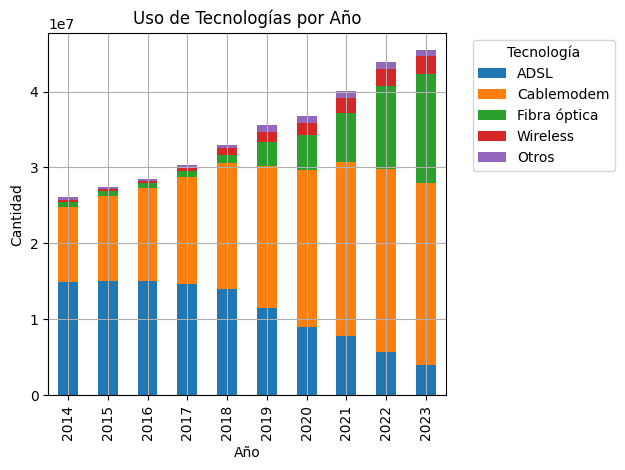

In [45]:
plt.figure(figsize=(10, 6))
df_total_acc_tec_3.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum().plot(kind='bar', stacked=True)

plt.title('Uso de Tecnologías por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Aqui es donde vemos una diferencia en comparación del análisis en provincias que presentan mucha
mayor cantidad de outliers, en este ejercicio solo vemos 2 en Fibra óptica. Podemos sacar varias
conclusiones, una de ellas es que en algunas casas puedan tener más de una tecnología como ya lo hemos
visto, asi mismo, este dataframe es un recuento de cada tecnología y es menos sensible a la variabilidad
en cambio al hacer una extracción en diferentes provincias, podemos obtener una mayor variabilidad
en nuestros datos debido a su naturaleza. Pero lo que si es cierto, es el numero de entradas entre los
dos DataFrames, uno tiene 960 y otro 36, ahí una respuesta clara a todo este cuestionamiento.

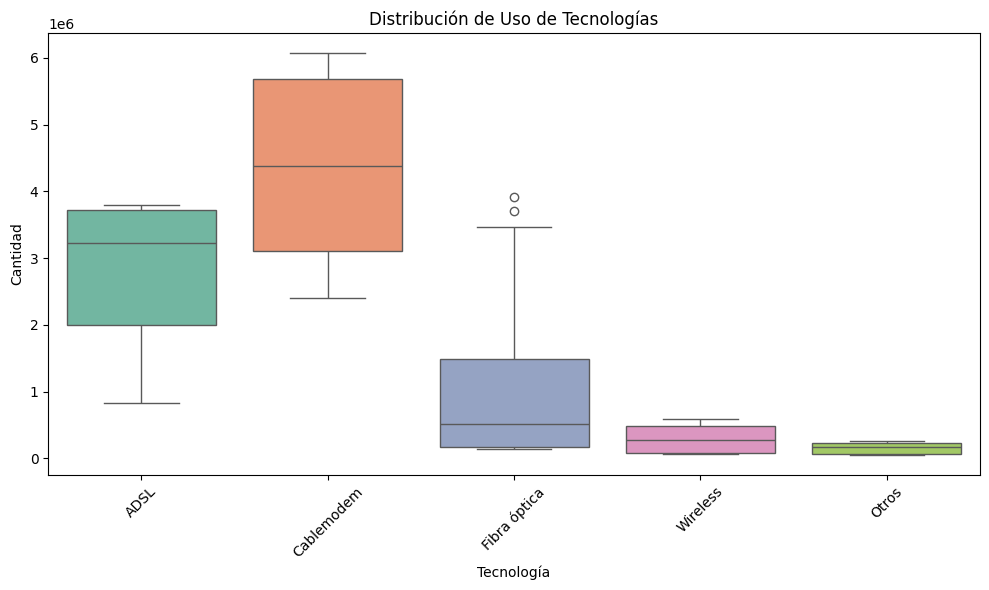

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_total_acc_tec_3[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']], palette='Set2')

plt.title('Distribución de Uso de Tecnologías')
plt.xlabel('Tecnología')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mediante el siguiente gráfico de lineas se observa la evolución de las tecnologías a lo largo del tiempo y es solo para confirmar la alza de Cableboom y Fibra óptica

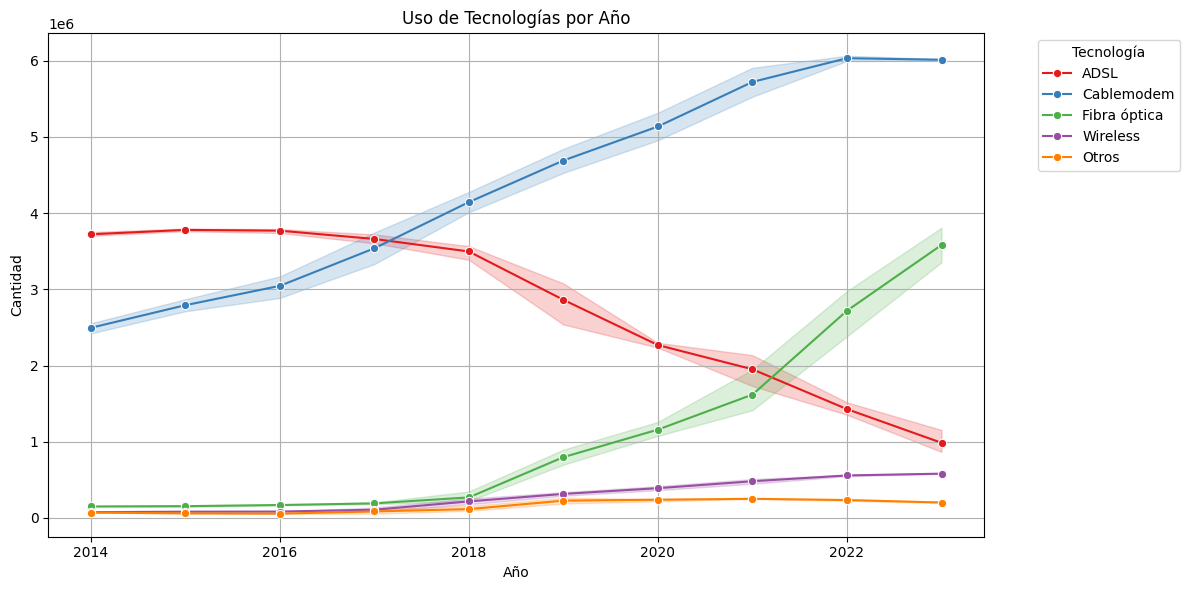

In [47]:
df_lines=df_total_acc_tec_3.melt(id_vars=['Año'], value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'],
                   var_name='Tecnología', value_name='Cantidad')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_lines, x='Año', y='Cantidad', hue='Tecnología', palette='Set1',marker='o')

plt.title('Uso de Tecnologías por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Gráficos para df_vel_prom_prov

In [48]:
df_vel_prom_prov.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,21.615656
std,2.873778,1.118617,29.340381
min,2014.000000,1.000000,2.570000
25%,2016.000000,1.750000,4.685000
50%,2018.500000,2.500000,8.885000
75%,2021.000000,3.250000,25.682500
max,2023.000000,4.000000,234.440000


Por útlimo, se observa una gráfica con el promedio de velocidad en las 10 provincias que más alta tienen esta medida y Capital Federal y Buenos Aires tienen una media incluso mayor que la del todo el DataFrame

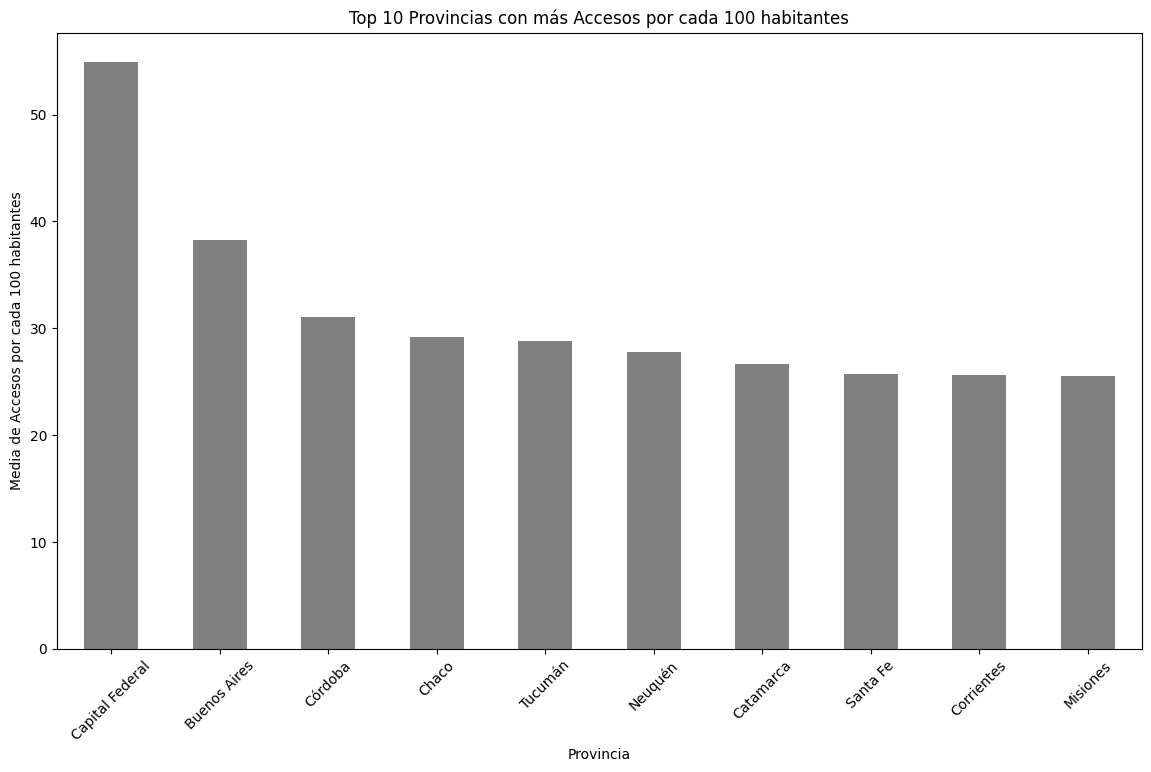

In [49]:
provincia_mean=df_vel_prom_prov.groupby('Provincia')['Mbps (Media de bajada)'].mean().sort_values(ascending=False)

top_10_provincias = provincia_mean.head(10)

plt.figure(figsize=(14, 8))
top_10_provincias.plot(kind='bar', color='gray')
plt.title('Top 10 Provincias con más Accesos por cada 100 habitantes')
plt.xlabel('Provincia')
plt.ylabel('Media de Accesos por cada 100 habitantes')
plt.xticks(rotation=45)
plt.show()

Insights

1.- Las tecnologías 'Cablemodem' y 'Fibra 'optica' crecieron en 200% y 110% respectivamente su uso en 9 años.

2.- Buenos Aires, Capital Federal y Córdoba son las provincias que más uso tienen de estas tecnologías.

3.- Provincias como San Luis, Chubut y La Pampa se puede buscar tener mayor acceso a internet.

4.- La velocidad de internet de + 30 Mbps tuvo un aumento a partir del 2018.

5.- La velocidad de internet de + 6 Mbps - 10 Mbps mantiene un comportamiento estable.

6.- Los ingresos en los primeros trimestres tienen una tendencia seguir creciendo de manera estable.

7.- En promedio, por cada 100 hogares, el 45% tiene acceso a internet.

8.- Del 2014 al 2023 hubo un aumento de 90% en cantidad de hogares que tienen acceso a internet.

9.- En promedio, por cada 100 habitantes, el 18% tiene acceso a internet.

10.- Existe la posibilidad de que un hogar tenga más de una tecnología en uso.

11.- Al haber más demanda de internet, como sonsecuencia, los ingresos aumentaron 100% del 2022 al 2023

12.- Existe una diferencia entre el porcentaje de acceso entre hogar e individuo con tendencia a la alza.

13.- Wireless es una tecnología con poca presencia pero con estabilidad.

Conclusiones

El Análsis Exploratorio de Datos (EDA) nos brinda una gran información acerca de nuestros datos inlcuso de los menos visibles, de ahí podemos observar tendencias, similitudes, métricas y comportamientos que son de gran valor. El objetivo de este análsis es explorar el aceso a internet de los años 2014 hasta 2023 en Argentina para identificar áreas de mejora y oportunidades de crecimiento para la empresa proveedora y brindar la calidad de sus servicios.
Se presentaron insights encontrados dentro del análisis de los que se destacan:

1.- Las tecnologías 'Cablemodem' y 'Fibra óptica' tuvieron un aumento a partir del 2016.

2.- Diferencia entre el porcentaje de hogares e individuos que usan internet.

3.- La velocidad de + 6 Mbps - 10 Mbps sigue estando presente junto a la tecnología Wireless.

4.- Provincias con mucha presencia de internet en contraste con algunas con poca presencia.

5.- La velocidad de + 30 Mbps es la más solicitada.

El crecimeinto anual de ingresos refleja un aumento en la demanda de este servicio, a su vez, la implementación de nuevas tecnologías y mayor velocidad hacen que este fenómeno se mantenga. El hecho de que haya provincias con menor uso/acceso de internet puede deberse a factores económicos y geográficos. La diferencia entre uso/aceso entre hogar e individuo puede ser causado porque en una casa exista una conexión a internet, pero que fuera de esa casa uno o más individuos no tengan alguna conexión.

Después del análisis se presentan las siguientes oportunidades de mejora y recomendaciones:

La creación de estrategias de marketing en esas provincias donde se tiene poco uso/acceso de internet puede ser clave para posicionarse mejor en el mercado. Implementar nuevos paquetes de internet móvil con una buena conexión y a precio acesible para lograr que un mayor número de personas fuera de casa tenga conexión a internet, buscar alianzas gubernamentales para colocar puestos de WiFi públicos en avenidas, calles, plazas y con ello lograr mejor imagen de marca. En lugares de díficl acceso por condiciones geográficas, colocar puntos WiFi con venta de tarjetas que incluyan internet ilimitado por cierto tiempo, puede ayudar a potencializar los ingresos. Ofrecer paquetes con una conexión de + 6 Mbps - 10 Mbps de diferente tiempo de uso, desde 2 horas, hasta 1 mes, teniendo en cuenta que esa es la velocidad que se mantiene a pesar de la existencia de mayores velocidades. Aprovechar la demanda poblacional y seguir implmenetando conexiones y tecnologías que cumplan con las necesidades tanto de las grandes provincias como de las más pequeñas. Diseñar campañas con promociones en los primeros meses de contratación con la marca para atraer nuevos usuarios. Se recomienda hacer un análisis de infraestructura y financiero (con los ingresos dados, gastos operativos, sueldos, mantenimiento de infraestrucura, gastos en camapañas de marketing, posibles paquetes de inversiones) en donde se evalue la posibildad de ampliar la red de cobertura y aumentar la velocidad para una conexión de internet móvil y para hogares a lo largo del país y así llegar a nuevos clientes y mejorar el servicio.


En cuanto a las limitaciones del análisis, al no tener información acerca de factores externos como pueden ser económicos, políticos, geográficos, demográficos, competitivos (cuántas empresas hay que ofrezcan conexión a internet, qué tipo de tecnología usan, qué velocidad tienen, en qué zonas del país tienen más presencia, qúe oferta y demanda tienen, etc.) puede que se pierdan algunas medidas que ayuden a potencializar aún más la presencia e ingresos de la marca. Sin embargo, los datos proporionados para el análsis fueron de gran calidad para obtenr las oportunidades de mejora.

Se pueden llevar acabo futuros análisis como lo pueden ser, un análisis que integre las limitaciones mencionadas, hacer uno cada año aunado a lo ya recabado, analizar cómo las provincias con mayor uso/acceso a internet impactan en los ingresos y presencia de la marca.